In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from csv file

df = pd.read_csv('bikes.csv')

In [3]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# checking the shape of dataframe

df.shape

(17379, 17)

In [5]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# renaming few columns for better readibility

#df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

df.rename(columns={'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'},inplace=True)

In [8]:
# Check the head of the dataset

df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['rec_id','datetime','casual','registered'],axis=1,inplace=True)

In [10]:
# Encoding/mapping the season column

df.season = df.season.map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})

In [11]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [12]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [13]:
# Encoding/mapping the weathersit column

df.weather_condition = df.weather_condition.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [14]:
# check the head of the dataset

df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
0,winter,0,jan,0,0,sat,0,Clear,0.24,0.2879,0.81,0.0,16
1,winter,0,jan,1,0,sat,0,Clear,0.22,0.2727,0.80,0.0,40
2,winter,0,jan,2,0,sat,0,Clear,0.22,0.2727,0.80,0.0,32
3,winter,0,jan,3,0,sat,0,Clear,0.24,0.2879,0.75,0.0,13
4,winter,0,jan,4,0,sat,0,Clear,0.24,0.2879,0.75,0.0,1


In [15]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             17379 non-null  object 
 1   year               17379 non-null  int64  
 2   month              17379 non-null  object 
 3   hour               17379 non-null  int64  
 4   is_holiday         17379 non-null  int64  
 5   weekday            17379 non-null  object 
 6   is_workingday      17379 non-null  int64  
 7   weather_condition  17379 non-null  object 
 8   temp               17379 non-null  float64
 9   atemp              17379 non-null  float64
 10  humidity           17379 non-null  float64
 11  windspeed          17379 non-null  float64
 12  total_count        17379 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


## Step 2: Visualising the Data

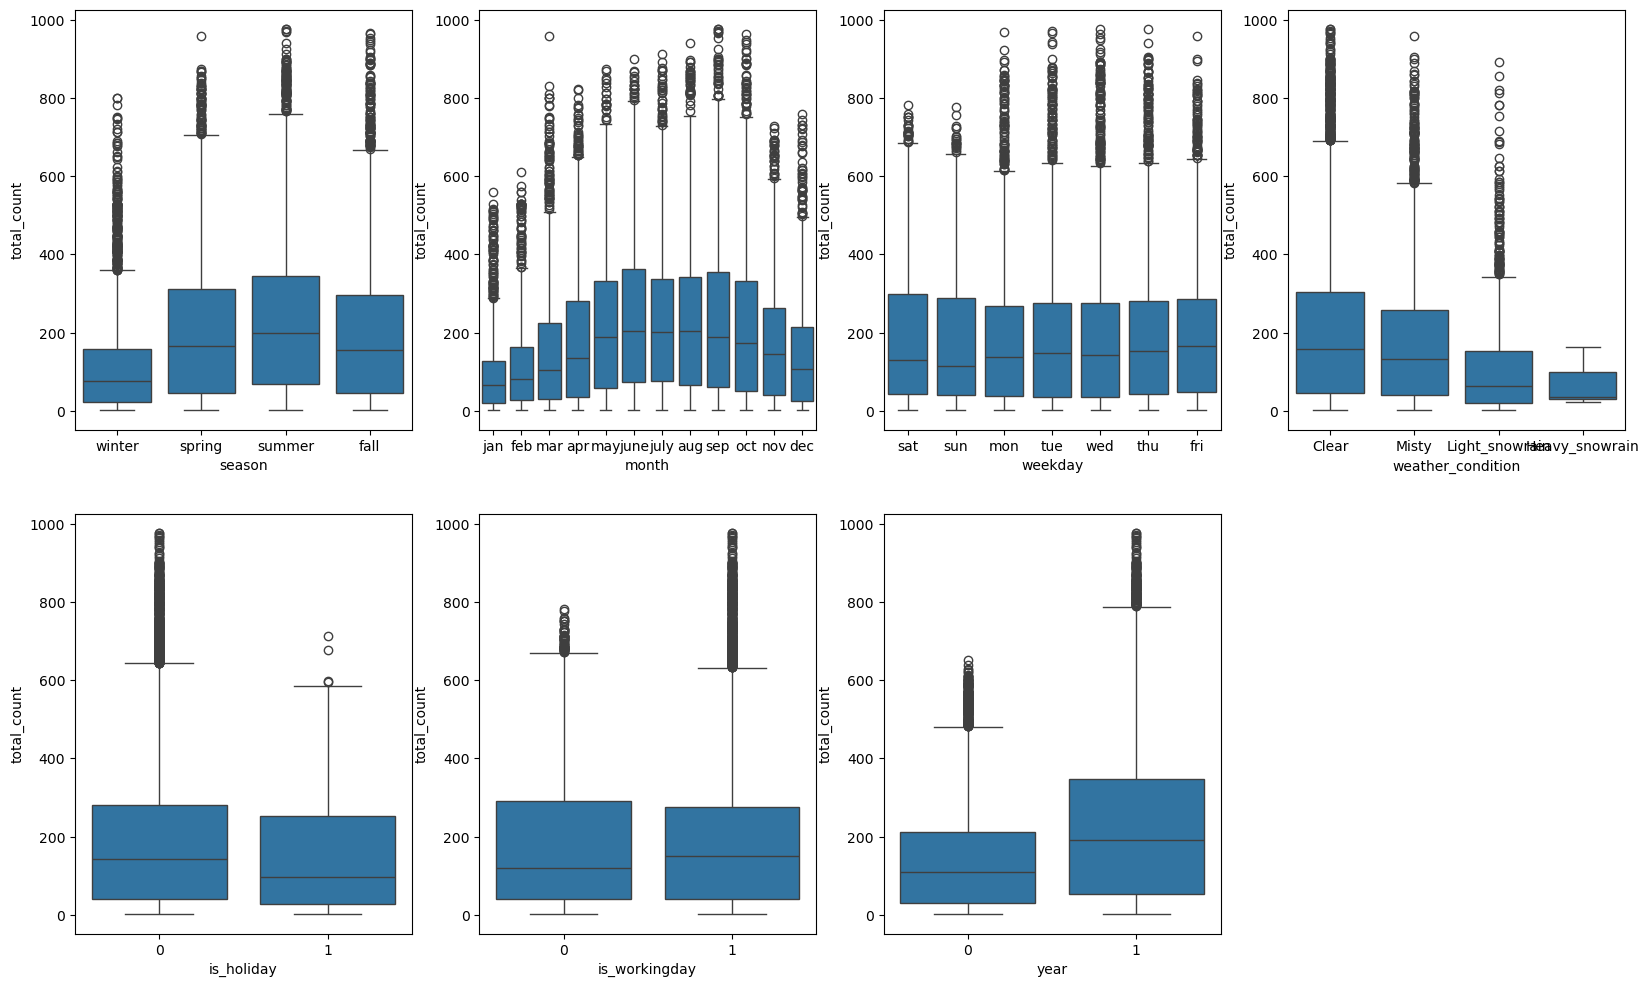

In [16]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'total_count', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'total_count', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'total_count', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weather_condition', y = 'total_count', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'is_holiday', y = 'total_count', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'is_workingday', y = 'total_count', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'total_count', data = df)
plt.show()

In [17]:
# function to create barplot related to categorical columns
def plot_cat_columns(column):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='total_count',data=df,ci = None)

    plt.subplot(1,2,2)
    sns.barplot(x=column,y='total_count',data=df, hue='year',ci = None)
    plt.legend()
    plt.show()

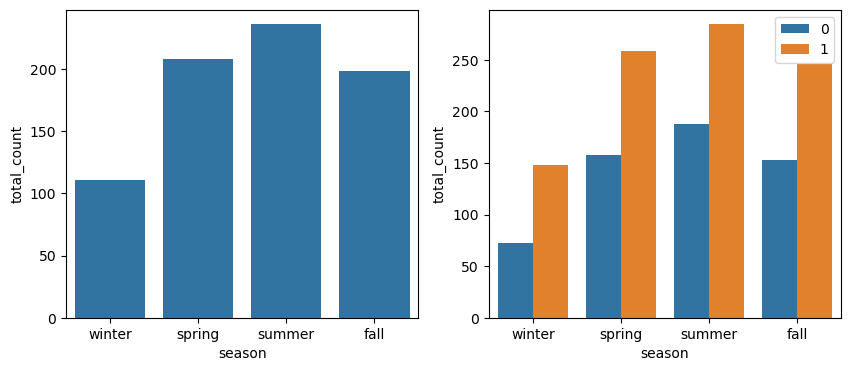

In [18]:
# plotting visualization for season column
plot_cat_columns('season')

Summer season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2011 to 2012.

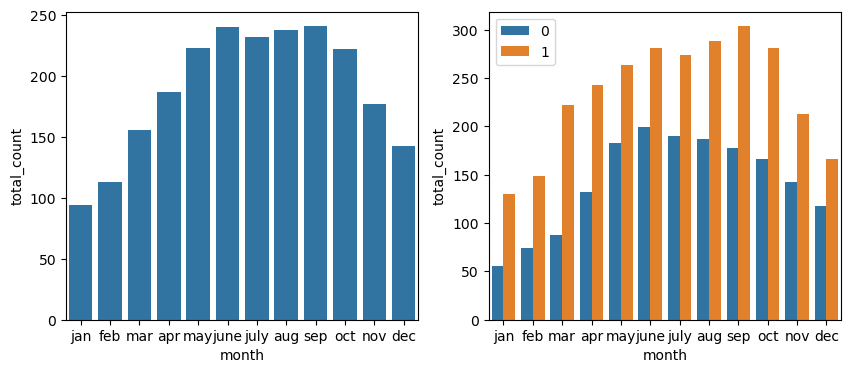

In [19]:
# plotting visualization for month column

plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2011 to 2012, then further decreased.

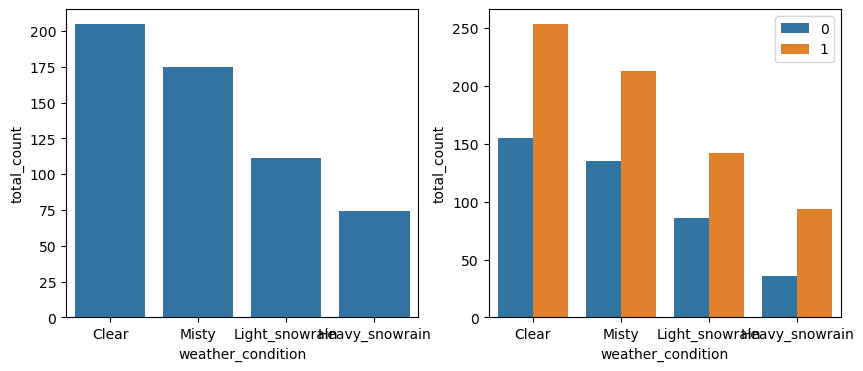

In [20]:
# plotting visualization for weathersit column

plot_cat_columns('weather_condition')

Clear weather attracted more booking which seems obvious.

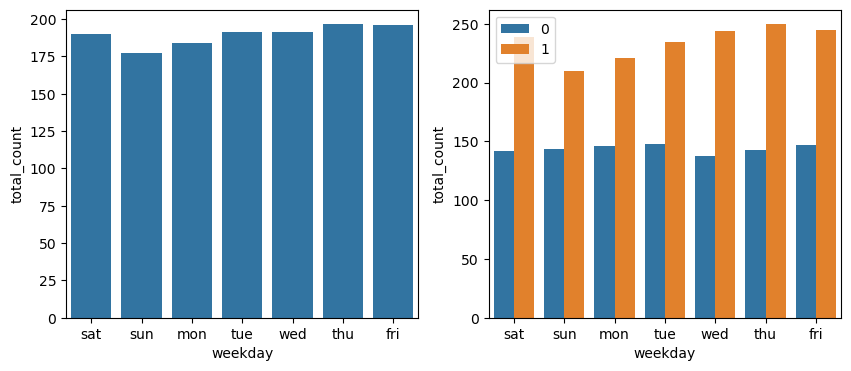

In [21]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

* When "holiday" is 1, it indicates that the day is a public holiday or a special day (e.g., Christmas, New Year's Day, Thanksgiving, etc.).
* When "holiday" is 0, it indicates that the day is a regular working day or a non-holiday.

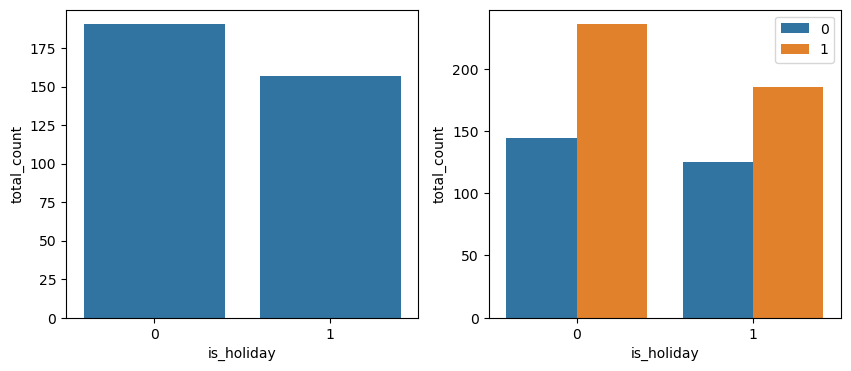

In [22]:
# plotting visualization for holiday column

plot_cat_columns('is_holiday')

* If day is neither weekend nor holiday is 1, otherwise is 0.
* When "workingday" is 1, it indicates that the day is a regular working day (e.g., Monday to Friday, excluding holidays).
* When "workingday" is 0, it indicates that the day is either a weekend or a holiday.

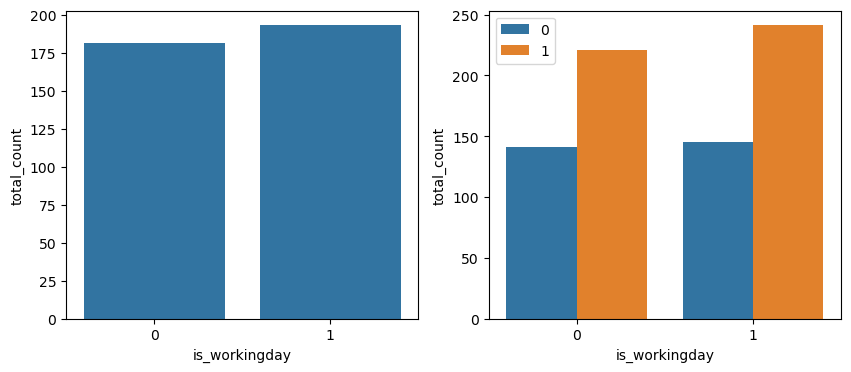

In [23]:
# plotting visualization for workingday column

plot_cat_columns('is_workingday')

Booking seemed to be almost unequal either on working day or non-working day. But, the count increased from 2011 to 2012.

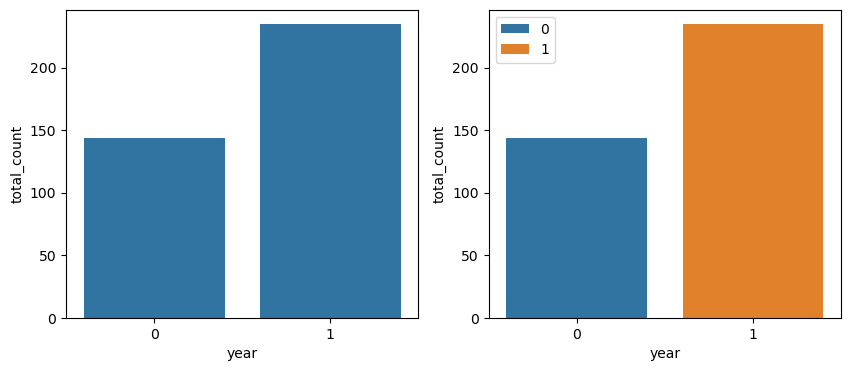

In [24]:
# plotting visualization for year column

plot_cat_columns('year')

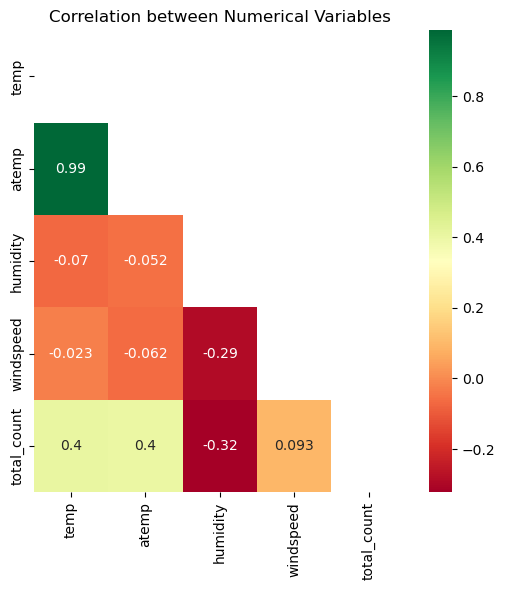

In [25]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','total_count']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','total_count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()